## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Your code here - remember to use markdown cells for comments as well!

The goal for this project is to explore a variety of movie data bases to help Microsoft make educated decisions about how to enter into the 

In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

QUESTION 1: How does the release date of a film influence return on investment?

For this analysis, I am going to use data from The Numbers movie budgets csv. This data provides us with the release date, production budget, and worldwide gross revenue. All three data points will be needed to investigate how the release date of a movie affects the productions return on investment. 



In [114]:
#importing the numbers movie budgets csv
with open('zippedData/tn.movie_budgets.csv') as f:
    tn_df = pd.read_csv(f)
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [115]:
#Inspecting column data types
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Upon initial investigation, this dataframe contains 5782 non-null entries. Release date, production budget, and worldwide gross are all object data types. In order to manipulate this data more effectively, converting domestic gross and worldwide gross into integer data types and release date to datetime data type is necessary.

In [116]:
#Converting columns object Dtype to numerical/datetime values
tn_df['production_budget'] = pd.to_numeric(tn_df['production_budget'].replace('[$,]','', regex=True))
tn_df['domestic_gross'] = pd.to_numeric(tn_df['domestic_gross'].replace('[$,]','', regex=True))
tn_df['worldwide_gross'] = pd.to_numeric(tn_df['worldwide_gross'].replace('[$,]','', regex=True))
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])

In [117]:
#Checking to see if that worked
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [127]:
#Checking for NaN values in the dataset
tn_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

While there are no NaN entries in the dataframe, I want to investigate whether there are entries of 0 in my ROI parameters.

In [131]:
#Checking of worldwide_gross values equal to 0
tn_df.loc[tn_df['worldwide_gross'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,2020-12-31,Moonfall,150000000,0,0
479,80,2017-12-13,Bright,90000000,0,0
480,81,2019-12-31,Army of the Dead,90000000,0,0
535,36,2020-02-21,Call of the Wild,82000000,0,0
670,71,2019-08-30,PLAYMOBIL,75000000,0,0
...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000,0,0
5764,65,2007-12-31,Tin Can Man,12000,0,0
5771,72,2015-05-19,Family Motocross,10000,0,0
5777,78,2018-12-31,Red 11,7000,0,0


In [130]:
len(tn_df.loc[tn_df['worldwide_gross'] == 0])

367

In [129]:
tn_df.loc[tn_df['production_budget'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


It looks like there are 367 values in the worldwide gross column that have 0 as an entry. I am opting to drop these values from the dataframe so that they do not affect the ROI calculation for those particular release dates.

In [20]:
#Dropping 0 values
tn_df = tn_df[tn_df['worldwide_gross'] != 0]

In [21]:
#Did that work
tn_df.head()
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5415 non-null   int64         
 1   release_date       5415 non-null   datetime64[ns]
 2   movie              5415 non-null   object        
 3   production_budget  5415 non-null   int64         
 4   domestic_gross     5415 non-null   int64         
 5   worldwide_gross    5415 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 296.1+ KB


In [132]:
#Creating month of the year column
tn_df['Month of Release'] = tn_df['release_date'].dt.month_name()
tn_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Month of Release
5777,78,2018-12-31,Red 11,7000,0,0,December
5778,79,1999-04-02,Following,6000,48482,240495,April
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,July
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,September
5781,82,2005-08-05,My Date With Drew,1100,181041,181041,August


In [133]:
# We would like to see percent ROI, creating a column that shows worldwide gross / production budget  
tn_df['Percent ROI'] = tn_df['worldwide_gross'] / tn_df['production_budget'] *100
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Month of Release,Percent ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,December,653.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,254.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,June,42.789243
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,May,424.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,December,415.369636


In [134]:
#Creating a day of the week column
tn_df['Day of Week'] = tn_df['release_date'].dt.day_name()
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Month of Release,Percent ROI,Day of Week
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,December,653.257713,Friday
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,254.667286,Friday
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,June,42.789243,Friday
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,May,424.384139,Friday
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,December,415.369636,Friday


In [135]:
month_roi_df = tn_df[['Month of Release', 'Percent ROI']]
month_roi_df.head()

,Month of Release,Percent ROI
0,December,653.257713
1,May,254.667286
2,June,42.789243
3,May,424.384139
4,December,415.369636


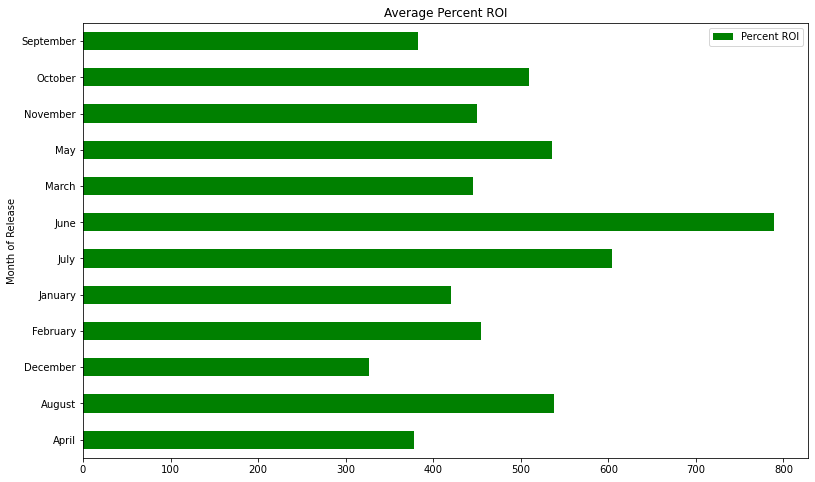

In [136]:
grouped_df = month_roi_df.groupby('Month of Release').mean()
grouped_df.plot(kind='barh', figsize=(13,8), title='Average Percent ROI', xlabel='Month of Release', ylabel='Percent Return on Investment', color='green')
plt.show()

In [97]:
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [96]:
conn = sqlite3.connect('zippedData/im.db')
imdb_df = pd.read_sql("""SELECT *
                           FROM movie_basics
                           JOIN movie_ratings
                              USING(movie_id)
                      """, conn)

In [98]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [101]:
imdb_df['primary_title'].str.strip()
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [102]:
imdb_df.set_index('primary_title')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [103]:
tn_df['movie'].str.strip()

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5775                                         Cavite
5776                                The Mongol King
5778                                      Following
5779                  Return to the Land of Wonders
5781                              My Date With Drew
Name: movie, Length: 5415, dtype: object

In [105]:
genre_gross = imdb_df.merge(tn_df, left_on='primary_title', right_on='movie')
genre_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           2600 non-null   object        
 1   primary_title      2600 non-null   object        
 2   original_title     2600 non-null   object        
 3   start_year         2600 non-null   int64         
 4   runtime_minutes    2491 non-null   float64       
 5   genres             2592 non-null   object        
 6   averagerating      2600 non-null   float64       
 7   numvotes           2600 non-null   int64         
 8   release_date       2600 non-null   datetime64[ns]
 9   movie              2600 non-null   object        
 10  production_budget  2600 non-null   int64         
 11  domestic_gross     2600 non-null   int64         
 12  worldwide_gross    2600 non-null   int64         
 13  day_of_week        2600 non-null   object        
 14  Month of

In [106]:
genre_ROI_df = genre_gross[['genres', 'ROI']].sort_values('ROI', ascending=False)
genres_top_25 = genre_ROI_df.head(25)
genres_top_25.head()

,genres,ROI
1732,"Horror,Mystery,Thriller",41656.474000
1930,"Biography,Documentary",31235.431235
2116,Horror,26392.161404
2042,"Action,Comedy,Drama",22500.000000
2043,"Action,Drama,Romance",22500.000000


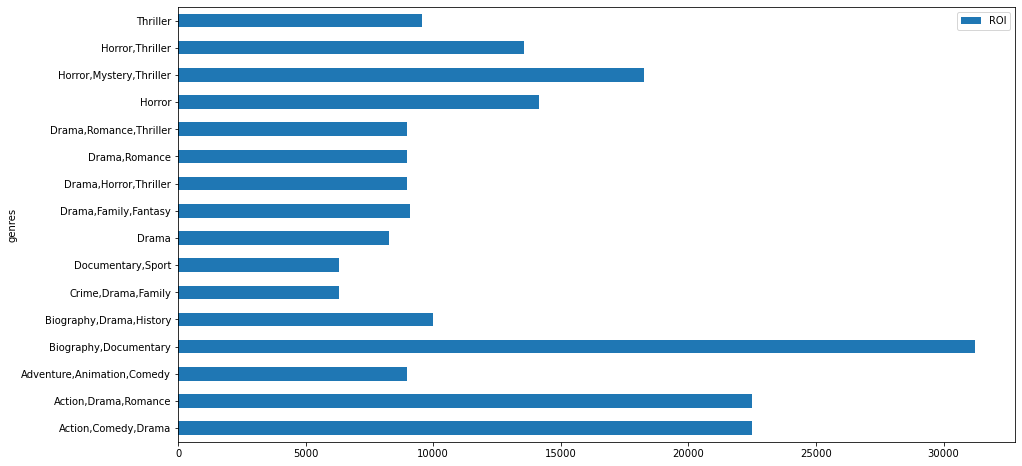

In [107]:
group = genres_top_25.groupby('genres').mean()
group.plot(kind='barh', figsize=(15,8))
plt.show()

QUESTION #2: How does the release date of a movie influence return on investment?

For this analysis, I am going to use data from The Numbers movie budgets csv. This data provides us with the release date, production budget, and worldwide gross revenue. All three data points will be needed to investigate how the release date of a movie affects the productions return on investment. 



In [4]:
#importing the numbers movie budgets csv
with open('zippedData/tn.movie_budgets.csv') as f:
    tn_df = pd.read_csv(f)
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
#Inspecting column data types
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Upon initial investigation, this dataframe contains 5782 non-null entries. Release date, production budget, and worldwide gross are all object data types. In order to manipulate this data more effectively, converting domestic gross and worldwide gross into integer data types and release date to datetime data type is necessary.

In [6]:
#Converting columns object Dtype to numerical/datetime values
tn_df['production_budget'] = pd.to_numeric(tn_df['production_budget'].replace('[$,]','', regex=True))
tn_df['domestic_gross'] = pd.to_numeric(tn_df['domestic_gross'].replace('[$,]','', regex=True))
tn_df['worldwide_gross'] = pd.to_numeric(tn_df['worldwide_gross'].replace('[$,]','', regex=True))
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])

In [7]:
#Checking to see if that worked
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [8]:
len(tn_df.loc[tn_df['worldwide_gross'] == 0])

367

In [9]:
len(tn_df.loc[tn_df['production_budget'] == 0])

0

In [15]:
tn_df['movie'].value_counts()

King Kong                                3
Halloween                                3
The Alamo                                2
Unknown                                  2
Ca$h                                     2
                                        ..
The Hunger Games: Mockingjay - Part 1    1
Motherâs Day                           1
Hotel Artemis                            1
Holmes & Watson                          1
MOOZ-lum                                 1
Name: movie, Length: 5339, dtype: int64

In [19]:
tn_df.loc[tn_df['movie'] == 'Halloween']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3014,15,2007-08-31,Halloween,15000000,58269151,77514401
3535,36,2018-10-19,Halloween,10000000,159342015,254900667
5536,37,1978-10-17,Halloween,325000,47000000,70000000


In [20]:
tn_df = tn_df[tn_df['worldwide_gross'] != 0]

In [21]:
tn_df.head()
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5415 non-null   int64         
 1   release_date       5415 non-null   datetime64[ns]
 2   movie              5415 non-null   object        
 3   production_budget  5415 non-null   int64         
 4   domestic_gross     5415 non-null   int64         
 5   worldwide_gross    5415 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 296.1+ KB


In [23]:
#Creating month of the year column
tn_df['Month of Release'] = tn_df['release_date'].dt.month_name()
tn_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,day_of_week,Month of Release
5775,76,2006-05-26,Cavite,7000,70071,71644,Friday,May
5776,77,2004-12-31,The Mongol King,7000,900,900,Friday,December
5778,79,1999-04-02,Following,6000,48482,240495,Friday,April
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,Wednesday,July
5781,82,2005-08-05,My Date With Drew,1100,181041,181041,Friday,August


In [24]:
# We would like to see ROI, creating a column that shows worldwide gross - production budget
tn_df['ROI'] = tn_df['worldwide_gross'] / tn_df['production_budget'] *100
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,day_of_week,Month of Release,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Friday,December,653.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Friday,May,254.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Friday,June,42.789243
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Friday,May,424.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Friday,December,415.369636


In [25]:
#Creating a day of the week column
tn_df['day_of_week'] = tn_df['release_date'].dt.day_name()
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,day_of_week,Month of Release,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Friday,December,653.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Friday,May,254.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Friday,June,42.789243
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Friday,May,424.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Friday,December,415.369636


In [26]:
#Dropping movie id column
tn_df.drop(columns=['id'], inplace=True)
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,day_of_week,Month of Release,ROI
0,2009-12-18,Avatar,425000000,760507625,2776345279,Friday,December,653.257713
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Friday,May,254.667286
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Friday,June,42.789243
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Friday,May,424.384139
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Friday,December,415.369636


In [29]:
month_roi_df = tn_df[['Month of Release', 'ROI']]
month_roi_df.head()

,Month of Release,ROI
0,December,653.257713
1,May,254.667286
2,June,42.789243
3,May,424.384139
4,December,415.369636


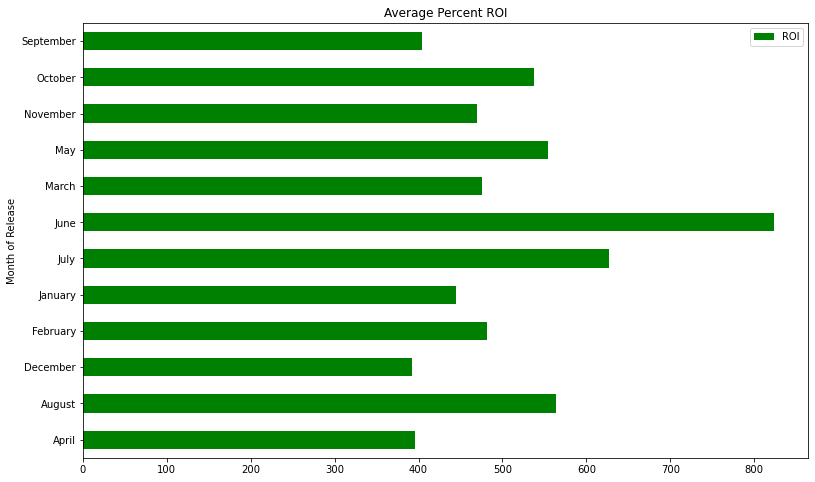

In [94]:
grouped = month_roi_df.groupby('Month of Release').mean()
grouped.plot(kind='barh', figsize=(13,8), title='Average Percent ROI', xlabel='Month of Release', ylabel='Percent Return on Investment', color='green')
plt.show()

In [36]:
grouped.sort_values(by="Month of Release")

,ROI
Month of Release,
April,395.989336
August,564.200106
December,392.129627
February,481.822232
January,444.222007
July,626.804201
June,823.349291
March,475.303134
May,554.165116


QUESTION 3: What directors produce the highest ROI for movie productions?

In [91]:
conn = sqlite3.connect('zippedData/im.db')
directors_df = pd.read_sql("""SELECT DISTINCT primary_name, primary_title
                                   FROM persons p
                                   JOIN directors d
                                       USING(person_id)
                                   JOIN movie_basics
                                       USING(movie_id);
                                   """, conn)
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162873 entries, 0 to 162872
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   primary_name   162873 non-null  object
 1   primary_title  162873 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [92]:
directors_df.loc[directors_df['primary_title'] == 'World of Death']

,primary_name,primary_title
4512,Steven Payne,World of Death
8500,A Normale Jef,World of Death
23292,Craig Ouellette,World of Death
25052,Shane Free,World of Death
26506,Jay Wade Edwards,World of Death
...,...,...
147438,Timothy Thomas,World of Death
156255,Curt Dennis,World of Death
157219,James Farris,World of Death
160750,Ryan Henry Knight,World of Death


In [52]:
directors_df.set_index('primary_title')

,primary_name
primary_title,
Paano na kaya,Ruel S. Bayani
No Other Woman,Ruel S. Bayani
One More Try,Ruel S. Bayani
Kasal,Ruel S. Bayani
The Quiet Philanthropist: The Edith Gaylord Story,Bryan Beasley
...,...
The Old Road,Zheng Wei
Chain Jayapal,Rama Narayanan
Arya Suriya,Rama Narayanan


In [84]:

tn2_df['movie'].value_counts()

AttributeError: 'function' object has no attribute 'reset_index'

In [61]:
directors_ROI_df = directors_df.merge(tn2_df, left_on='primary_title', right_on='movie')
directors_ROI_df.head()

,primary_title,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,day_of_week,Month of Release,ROI
0,Diary of a Wimpy Kid: Rodrick Rules,David Bowers,2011-03-25,18000000,52698535,73695194,Friday,March,409.417744
1,Diary of a Wimpy Kid: Dog Days,David Bowers,2012-08-03,22000000,49008662,77229695,Friday,August,351.044068
2,Diary of a Wimpy Kid: The Long Haul,David Bowers,2017-05-19,22000000,20738724,35609577,Friday,May,161.861714
3,Red Dawn,Dan Bradley,2012-11-21,65000000,44806783,48164150,Wednesday,November,74.098692
4,Closer to the Moon,Nae Caranfil,2014-04-17,1500000,0,5396,Thursday,April,0.359733


In [70]:
top_direct_df = directors_ROI_df.sort_values('ROI', ascending=False)

In [71]:
d_ROI_plot_df = top_direct_df[['primary_name', 'ROI']]
d_ROI_plot_df.head()

,primary_name,ROI
3061,Travis Cluff,41656.474000
3060,Chris Lofing,41656.474000
3008,Sébastien Lifshitz,31235.431235
3719,Chad Zuver,26392.161404
725,Adnan A. Shaikh,22500.000000


In [80]:
group_df = d_ROI_plot_df.groupby('primary_name').mean()
group_df.sort_values('ROI', ascending=False, inplace=True)
top_direct = group_df.head(25)

,ROI
primary_name,
Chris Lofing,41656.474000
Travis Cluff,41656.474000
Sébastien Lifshitz,31235.431235
Sujit Mondal,22500.000000
Adnan A. Shaikh,22500.000000
Chad Zuver,13265.547928
Paul Hendy,12427.788038
Karthik Chandan,12427.788038
Chris Stokes,9557.600000


In [73]:
top_direct.plot()

NameError: name 'rating_run' is not defined